In [10]:
import os
import IPython.display as ipd
import librosa
import torchaudio
import numpy as np
import wave

train_dir='../audioData/train/'
valid_dir='../audioData/val/'

In [11]:
train_sample=os.listdir(train_dir)
n=0
for sample in train_sample:
    if sample[:-4].split("-")[-1]=='dis':
        n = sample
        break
print(n)
ipd.Audio(train_dir+n)


30906-4-044-m-50-067-sad-sad-dis.wav


In [12]:
def time_mask(spec, T=20, num_masks=1, replace_with_zero=False):
#     cloned = spec.clone()
    len_spectro = spec.shape[1]
#     print("len",len_spectro)
    
    for i in range(0, num_masks):
        t = random.randrange(0, T)
        if(len_spectro<=t): return spec
        t_zero = random.randrange(0, len_spectro - t)
        # avoids randrange error if values are equal and range is empty
        if (t_zero == t_zero + t): return spec

        mask_end = random.randrange(t_zero, t_zero + t)
        if (replace_with_zero): spec[:,t_zero:mask_end] = 0
        else: spec[:,t_zero:mask_end] = spec.mean()
    return spec

#Export
def freq_mask(spec, F=30, num_masks=1, replace_with_zero=False):
#     cloned = spec.clone()
    num_mel_channels = spec.shape[0]
    
    for i in range(0, num_masks):        
        f = random.randrange(0, F)
        f_zero = random.randrange(0, num_mel_channels - f)

        # avoids randrange error if values are equal and range is empty
        if (f_zero == f_zero + f): return spec

        mask_end = random.randrange(f_zero, f_zero + f) 
        if (replace_with_zero): spec[f_zero:mask_end,:] = 0
        else: spec[f_zero:mask_end,:] = spec.mean()
    
    return spec


(257103,)
duration: 11.66 5.38702947845805


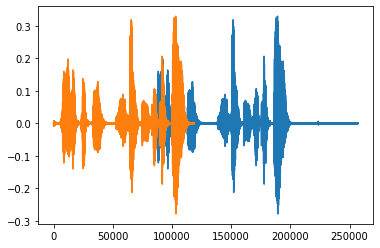

In [79]:
from torchvision import transforms
from PIL import Image
import random
import matplotlib.pyplot as plt
import librosa
from scipy.io.wavfile import write
# import pyaudio
# import simpleaudio as sa
# import sounddevice as sd
import soundfile as sf
%matplotlib inline
input_nfft=2048
input_stride=512
train_sample=os.listdir(train_dir)[67]
# print(train_sample)
y,sr=librosa.load(train_dir+train_sample,sr=44100,mono=False)
y=librosa.to_mono(y)
print(y.shape)
plt.plot(y)
itvs = librosa.effects.split(y,frame_length =16384, hop_length =1024,top_db = 20)
yt=[]
for st,ed in itvs:
    yt.append(y[st:ed])
yt = np.concatenate(yt)
plt.plot(yt)
print("duration:",librosa.get_duration(y),librosa.get_duration(yt))
scaled = np.int16(yt/np.max(np.abs(yt)) * 32767)
write('test.wav', sr, scaled)

In [69]:
for idx,item in enumerate(os.listdir(train_dir)):
    if "neu" in item:
        print(idx,item)
print(train_sample)

11 30184-4-043-w-53-016-neu-neu-neu.wav
12 20718-4-022-w-28-059-sad-neu-neu.wav
24 42394-4-070-w-46-038-fea-neu-neu.wav
25 30233-4-043-w-53-023-neu-dis-neu.wav
30 19126-4-018-w-52-067-neu-neu-neu.wav
36 49653-4-087-w-29-006-neu-neu-neu.wav
40 02955-3-029-w-23-127-neu-neu-neu.wav
42 40534-4-066-m-29-032-neu-neu-neu.wav
43 40576-4-066-m-29-038-neu-ang-neu.wav
50 13691-4-007-w-32-025-neu-neu-neu.wav
52 45077-4-076-m-49-048-neu-sad-ang.wav
60 39833-4-064-w-28-073-neu-neu-dis.wav
66 36356-4-056-w-28-055-sad-neu-sad.wav
67 21579-4-024-w-25-046-sad-neu-ang.wav
68 42917-4-071-w-46-045-sur-neu-sur.wav
69 12752-4-005-m-31-025-neu-neu-neu.wav
72 31357-4-045-m-43-063-neu-hap-dis.wav
76 25116-4-032-m-27-023-neu-neu-neu.wav
77 21935-4-025-w-26-030-neu-neu-neu.wav
78 30977-4-045-m-43-006-hap-neu-neu.wav
83 42922-4-071-w-46-046-neu-neu-neu.wav
88 35018-4-053-m-52-058-sad-neu-sad.wav
90 45014-4-076-m-49-039-neu-neu-neu.wav
98 10837-4-001-w-45-020-neu-neu-neu.wav
105 20732-4-022-w-28-062-neu-hap-neu.wav

In [80]:
print(train_sample)
ipd.Audio("test.wav")

21579-4-024-w-25-046-sad-neu-ang.wav


In [77]:
import colorednoise as cn
def mix_db(x,noise,db):
    E_x=np.mean(x**2)
    E_y=np.mean(noise**2)
    a = E_x/(E_y)*(10**(db/10))
    return (x+a*noise)/(a+1)
noise = cn.powerlaw_psd_gaussian(0,yt.shape[0]) #whitenoise
yn=mix_db(x=yt,noise=noise,db=random.randrange(0, 15))
scaled = np.int16(yn/np.max(np.abs(yn)) * 32767)
write('test.wav', sr, scaled)
ipd.Audio("test.wav")

# stft -> abs -> amp2db -> mel

30184-4-043-w-53-016-neu-neu-neu.wav
(128, 215)


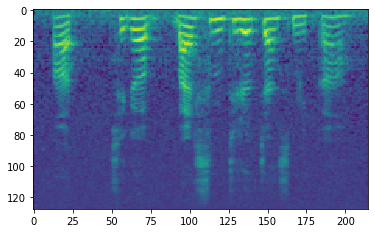

In [74]:
yS = np.abs(librosa.core.stft(yn,n_fft=input_nfft, hop_length=input_stride))
yS=librosa.feature.melspectrogram(S=librosa.amplitude_to_db(yS),sr=sr,n_mels=128,
                                 n_fft=input_nfft, hop_length=input_stride)
# yS=time_mask(freq_mask(yS)) #작동 확인
# y=Image.fromarray(y,"RGB") #이상한 첼레비전 신호가 나오네;;;
yS=(yS-np.min(yS))/(np.max(yS)-np.min(yS))
print(train_sample)
print(yS.shape)
plt.imshow(yS)

36356-4-056-w-28-055-sad-neu-sad.wav
(128, 139)


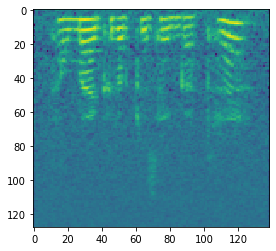

In [78]:
yS = np.abs(librosa.core.stft(yn,n_fft=input_nfft, hop_length=input_stride))
yS=librosa.feature.melspectrogram(S=librosa.amplitude_to_db(yS),sr=sr,n_mels=128,
                                 n_fft=input_nfft, hop_length=input_stride)
# yS=time_mask(freq_mask(yS)) #작동 확인
# y=Image.fromarray(y,"RGB") #이상한 첼레비전 신호가 나오네;;;
yS=(yS-np.min(yS))/(np.max(yS)-np.min(yS))
print(train_sample)
print(yS.shape)
plt.imshow(yS)

In [18]:
yS = np.abs(librosa.core.stft(yn,n_fft=input_nfft, hop_length=input_stride))

In [1]:
import numpy as np

In [9]:
np.eye(7)[3]

array([0., 0., 0., 1., 0., 0., 0.])

In [21]:
np.log10(yS)

array([[-1.2630045 , -1.269227  , -1.3064183 , ..., -1.3577541 ,
        -1.6710187 , -1.5890752 ],
       [-1.2641172 , -2.0821924 , -1.5922412 , ..., -0.93491787,
        -1.0373287 , -0.9862391 ],
       [-0.8389695 , -0.91866654, -1.0320854 , ..., -1.0915145 ,
        -0.7689808 , -1.143934  ],
       ...,
       [-1.5068846 , -1.6774935 , -1.2324865 , ..., -1.6294581 ,
        -1.8041532 , -1.4527812 ],
       [-1.2338678 , -1.2529861 , -1.5155184 , ..., -1.8635136 ,
        -1.4268156 , -1.2934428 ],
       [-1.0611199 , -1.4264987 , -1.6308595 , ..., -1.3477385 ,
        -1.17001   , -1.0705602 ]], dtype=float32)

# stft -> abs -> amp2db -> mel

(128, 209)


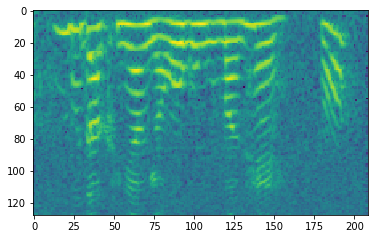

In [61]:
yS = np.abs(librosa.core.stft(yn,n_fft=input_nfft, hop_length=input_stride))
# yS=(yS-np.min(yS))/(np.max(yS)-np.min(yS))
yS=librosa.feature.melspectrogram(S=librosa.amplitude_to_db(yS),sr=sr,n_mels=128,
                                 n_fft=input_nfft, hop_length=input_stride,fmax=8000,fmin=60)
# yS=time_mask(freq_mask(yS)) #작동 확인
# y=Image.fromarray(y,"RGB") #이상한 첼레비전 신호가 나오네;;;
yS=(yS-np.min(yS))/(np.max(yS)-np.min(yS))
print(yS.shape)
plt.imshow(yS)

In [ ]:
yS = np.abs(librosa.core.stft(yn,n_fft=input_nfft, hop_length=input_stride))
yS=librosa.feature.melspectrogram(S=librosa.amplitude_to_db(yS),sr=sr,n_mels=128,
                                 n_fft=input_nfft, hop_length=input_stride)
yS=time_mask(freq_mask(yS)) #작동 확인
# y=Image.fromarray(y,"RGB") #이상한 첼레비전 신호가 나오네;;;
yS=(yS-np.min(yS))/(np.max(yS)-np.min(yS))
print(yS.shape)
plt.imshow(yS)

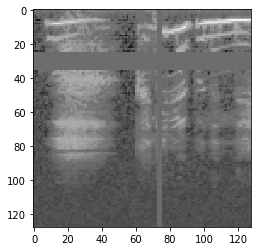

In [57]:
from torchvision import transforms
from matplotlib import cm
z=Image.fromarray(np.uint8(cm.gist_earth(yS)*255))
tfms = transforms.Compose([
    transforms.RandomCrop(128),
    transforms.Grayscale(3)
])
z=tfms(z)
plt.imshow(z)


In [15]:
#Export
def time_warp(spec, W=5):
    num_rows = spec.shape[0]
    spec_len = spec.shape[1]
    y = num_rows//2
    horizontal_line_at_ctr = spec[y,:]
    assert len(horizontal_line_at_ctr) == spec_len
    
    point_to_warp = horizontal_line_at_ctr[random.randrange(W, spec_len - W)]
    assert isinstance(point_to_warp, torch.Tensor)

    # Uniform distribution from (0,W) with chance to be up to W negative
    dist_to_warp = random.randrange(-W, W)
    src_pts, dest_pts = point_to_warp, point_to_warp + dist_to_warp
    warped_spectro, dense_flows = sparse_image_warp(spec, src_pts, dest_pts)
    return warped_spectro.squeeze(3)